# Incremental build time

RQ1: Does incremental build time outperform the clean build time of a system?

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Will show the incremental build time and the executable's binary size for all system's configurations
path = '/home/xternava/Documents/GitHub/Incremental-build/data/'
#path = '/src/data/'
df = pd.read_csv(path + 'buildtime_di1.csv')
df.columns
df = df.rename(columns = {"bt_real": "Build Time", "BinarySize": "Binary Size"})
df

,Branch,Option,Build Time,bt_user,bt_sys,Binary Size
0,ixterm-00001-00004,"['--disable-ansi-color', '--disable-direct-col...",11.3805,0.0008,0.0001,3344192
1,ixterm-00001-00003,"['--disable-ansi-color', '--disable-direct-col...",11.6992,0.0007,0.0001,3202648
2,ixterm-00001-00002,"['--disable-ansi-color', '--disable-direct-col...",8.2270,0.0000,0.0009,2468184
3,ixterm-00002-00004,"['--disable-ansi-color', '--disable-direct-col...",11.3572,0.0007,0.0002,3344192
4,ixterm-00002-00001,"['--disable-ansi-color', '--disable-256-color'...",8.5638,0.0007,0.0002,2736104
5,ixterm-00002-00003,"['--disable-ansi-color', '--disable-direct-col...",11.6970,0.0006,0.0002,3202648
6,ixterm-00003-00004,"['--disable-ansi-color', '--disable-direct-col...",11.4084,0.0001,0.0008,3344192
7,ixterm-00003-00001,"['--disable-ansi-color', '--disable-256-color'...",8.6463,0.0009,0.0000,2736104
8,ixterm-00003-00002,"['--disable-ansi-color', '--disable-direct-col...",8.2922,0.0001,0.0007,2468184
9,ixterm-00004-00001,"['--disable-ansi-color', '--disable-256-color'...",8.6192,0.0001,0.0009,2736104


In [3]:
# For further analyses, the branch names are extracted into separate columns
df[['Br0', 'Br1','Br2']] = df.Branch.str.split("-",expand=True)
df_setindex = df.set_index("Br2")
df = df_setindex[['Br1', 'Branch', 'Build Time', 'Binary Size']]

# The index is reset to incremental build configuration
dx = df.sort_index()
dx

,Br1,Branch,Build Time,Binary Size
Br2,,,,
00001,00002,ixterm-00002-00001,8.5638,2736104
00001,00003,ixterm-00003-00001,8.6463,2736104
00001,00004,ixterm-00004-00001,8.6192,2736104
00002,00001,ixterm-00001-00002,8.2270,2468184
00002,00003,ixterm-00003-00002,8.2922,2468184
00002,00004,ixterm-00004-00002,8.3104,2468184
00003,00001,ixterm-00001-00003,11.6992,3202648
00003,00002,ixterm-00002-00003,11.6970,3202648
00003,00004,ixterm-00004-00003,11.7625,3202648


In [4]:
# A detailed view of each incremental build time after clean build configurations
# Columns: clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Build Time"])
opt2.unstack()

Build Time                           
Br1        00001    00002    00003    00004
Br2                                        
00001        NaN   8.5638   8.6463   8.6192
00002     8.2270      NaN   8.2922   8.3104
00003    11.6992  11.6970      NaN  11.7625
00004    11.3805  11.3572  11.4084      NaN

In [5]:
# A detailed view of each executable's binary size after incremebtal build configurations
# Columns: clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Binary Size"])
opt2.unstack()

Binary Size                                 
Br1         00001      00002      00003      00004
Br2                                               
00001         NaN  2736104.0  2736104.0  2736104.0
00002   2468184.0        NaN  2468184.0  2468184.0
00003   3202648.0  3202648.0        NaN  3202648.0
00004   3344192.0  3344192.0  3344192.0        NaN

In [6]:
# The minimum, maximum, and average incremental build time for each system's configuration
ib_results = df.pivot_table(index = "Br2", 
                    values=["Build Time"], # values=["Build Time", "Binary Size"],
                    aggfunc=["max", "mean", "min"],
                    margins=True,
                    margins_name="Total")

ib_results[:-1].to_csv(path + 'incremental-bt.csv', 
                index=True, 
                header=['max', 'mean', 'min'])
ib_results

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00001,8.6463,8.609767,8.5638
00002,8.3104,8.276533,8.2270
00003,11.7625,11.719567,11.6970
00004,11.4084,11.382033,11.3572
Total,11.7625,9.996975,8.2270


In [7]:
sorted_min_ib = ib_results.reindex(ib_results['min'].sort_values(by="Build Time", ascending=False).index)
sorted_min_ib

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00003,11.7625,11.719567,11.6970
00004,11.4084,11.382033,11.3572
00001,8.6463,8.609767,8.5638
00002,8.3104,8.276533,8.2270
Total,11.7625,9.996975,8.2270


<AxesSubplot:xlabel='Configurations', ylabel='incremental build time [s]'>

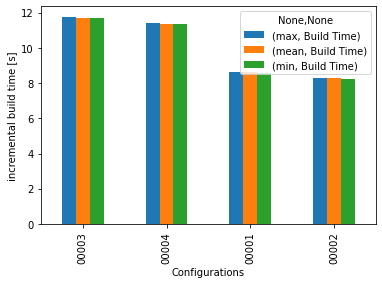

In [8]:
# Visualized the minimum, maxium, and average incremental build time for all configurations
import matplotlib.pyplot as plt

ib_plot = sorted_min_ib.iloc[:-1].plot(kind='bar')

ib_plot.set_xlabel("Configurations")
ib_plot.set_ylabel("incremental build time [s]")

#ib_plot.tight_layout(pad=1.0)
plt.savefig("./figures/fig01.pdf", bbox_inches = 'tight', pad_inches = 0)

ib_plot

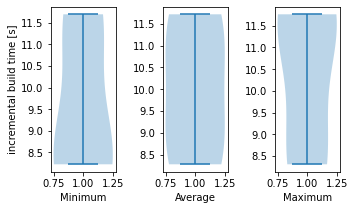

In [9]:
# The minimum, average, and maximum incremental build time summaried for all configurations
import matplotlib.pyplot as plt
 
all_data1 = ib_results['min']
labels1 = 'Minimum'
all_data2 = ib_results['mean']
labels2 = 'Average'
all_data3 = ib_results['max']
labels3 = 'Maximum'
     
plt.rc('font', size=10) 

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(5, 3))

ax1.violinplot(all_data1)
ax1.set_xlabel(labels1)
ax1.set_ylabel("incremental build time [s]")
                    
ax2.violinplot(all_data2)
ax2.set_xlabel(labels2)

ax3.violinplot(all_data3)
ax3.set_xlabel(labels3)

fig.tight_layout(pad=1.0)
plt.savefig("./figures/fig02.pdf", bbox_inches = 'tight', pad_inches = 0)

plt.show()